In [1]:
#Program executed with 200 cases
#Import all the preprocessed data

import warnings
warnings.filterwarnings("ignore")

#Load dataframe
import numpy as np
import pandas as pd
df = pd.read_pickle("200_cases.pkl")
case_id = df["caseid"].tolist()
#Save column reversed in own list
case_reversed = df["case_reversed"].tolist()
df = df.drop(columns=["caseid", "case_reversed"])

In [2]:
#Import metadata
df["caseid"] = case_id

metadata = pd.read_csv('case_metadata.csv')
metadata = metadata.drop(columns=["case_reversed", "year"])
metadata.fillna(0, inplace=True)
df = pd.merge(df, metadata, on="caseid")

judge_id = df["judge_id"].tolist()
log_cites = df["log_cites"].tolist()
x_republican = df["x_republican"].tolist()

df = df.drop(columns=["caseid", "judge_id", "log_cites", "x_republican"])
X = df

In [3]:
#Open the files
import glob
import errno
import spacy
nlp = spacy.load('en')

path = '../ps1/cases3/*.txt'
names = glob.glob(path)
files = []
for name in names:
    try:
        with open(name) as f:
            files.append(f.read())
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise

In [4]:
def get_sentences(doc):
    temp = []
    for sen in doc.sents:
        temp.append(sen.text)
        
    return temp

In [5]:
# Train Word2Vec models

from random import shuffle
from gensim.models import Word2Vec

tokens = pd.read_pickle("200_tokens.pkl")["tok"]

# train the models
w2v_1 = Word2Vec(tokens, workers = 8, size=300, min_count =  25, window = 2, sample = 1e-3)
w2v_1.init_sims(replace=True)

w2v_2 = Word2Vec(tokens, workers = 8, size=300, min_count =  25, window = 16, sample = 1e-3)
w2v_2.init_sims(replace=True)

w2v_1.wv['state'] # vector for word state

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


array([-0.00963034, -0.08319538, -0.11463871,  0.15777323, -0.00715943,
        0.02749375, -0.04365103,  0.05661575, -0.00701307,  0.01028149,
       -0.00886269, -0.12301348, -0.05942875,  0.05725268, -0.02423306,
        0.0954492 ,  0.05373749,  0.02854771,  0.00864124,  0.03522585,
        0.07813936, -0.03562183,  0.09706635, -0.00614316, -0.01840763,
        0.02716112,  0.03974278, -0.02139838,  0.10608752,  0.01398753,
       -0.05644576, -0.1301292 , -0.02661992,  0.07843387,  0.014728  ,
       -0.11198753,  0.00318052, -0.0881154 , -0.04927831, -0.04978778,
       -0.02381887, -0.08777308,  0.00275298, -0.03595616, -0.01009644,
       -0.03489428, -0.0548602 ,  0.01757931, -0.05670588,  0.05481153,
       -0.0112381 ,  0.00496909, -0.09381694, -0.0642324 , -0.00102022,
       -0.00638497,  0.04245442,  0.01137443,  0.02231658, -0.08369801,
       -0.06661724, -0.05325278,  0.0478829 , -0.0064413 ,  0.10027249,
        0.08235552,  0.08505762, -0.05888053, -0.01210926,  0.02

In [39]:
#Plot of both models
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# fit a 2d PCA model to the vectors
X1 = w2v_1[w2v_1.wv.vocab]
X2 = w2v_2[w2v_2.wv.vocab]
pca = PCA(n_components=2)
res1 = pca.fit_transform(X1)
res2 = pca.fit_transform(X2)

# create a scatter plot of the projection
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.scatter(res1[:100, 0], res1[:100, 1])
plt.title("Word vectors with window = 2")
words = list(w2v_1.wv.vocab)[:100]
for i, word in enumerate(words):
    plt.annotate(word, xy=(res1[i, 0], res1[i, 1]))
    
plt.subplot(2,1,2)
plt.scatter(res2[:100, 0], res2[:100, 1])
plt.title("Word vectors with window = 16")
words = list(w2v_2.wv.vocab)[:100]
for i, word in enumerate(words):
    plt.annotate(word, xy=(res2[i, 0], res2[i, 1]))
    
plt.show()

#So with a small window, the words are much more bound together as with a big window, 
# the words are much more distributed over the whole plane because the context, in which the words appear, overlap more often.

In [55]:
#Seperate republican and democrat cases
tok_r = []
tok_d = []

for i, x in enumerate(x_republican):
    if i == len(tokens):
        break
        
    if x == 1:             #republican
        tok_r.append(tokens[i])
    else:                  #democrat
        tok_d.append(tokens[i])
        
print(tok_r[:1])

[['booth', 'circuit', 'judge', 'appeal', 'order', 'deny', 'petition', 'appellant', 'plaintiff', 'tax', 'cost', 'appellee', 'trustee', 'fee', 'attorney', 'fee', 'short', 'fact', 'follow', 'wilmot', 'road', 'district', 'create', 'act', 'general', 'assembly', 'state', 'arkansa', 'approve', 'january', 'purpose', 'act', 'secure', 'construction', 'certain', 'road', 'run', 'town', 'wilmot', 'act', 'appoint', 'person', 'commissioner', 'say', 'district', 'provide', 'successor', 'office', 'constitute', 'body', 'politic', 'corporate', 'wilmot', 'road', 'district', 'quasi', 'public', 'corporation', 'appellee', 'act', 'provide', 'lay', 'certain', 'highway', 'say', 'commissioner', 'assessment', 'damage', 'benefit', 'connection', 'therewith', 'board', 'assessor', 'appoint', 'say', 'act', 'succeed', 'step', 'provide', 'act', 'entry', 'order', 'county', 'court', 'assessment', 'tax', 'real', 'property', 'district', 'sufficient', 'pay', 'estimate', 'cost', 'improvement', 'cent', 'add', 'unforeseen', 'con

In [10]:
#Train the models
w2v_r = Word2Vec(tok_r, workers = 8, size=300, min_count =  25, window = 10, sample = 1e-3)
w2v_r.init_sims(replace=True)

w2v_d = Word2Vec(tok_d, workers = 8, size=300, min_count =  25, window = 10, sample = 1e-3)
w2v_d.init_sims(replace=True)

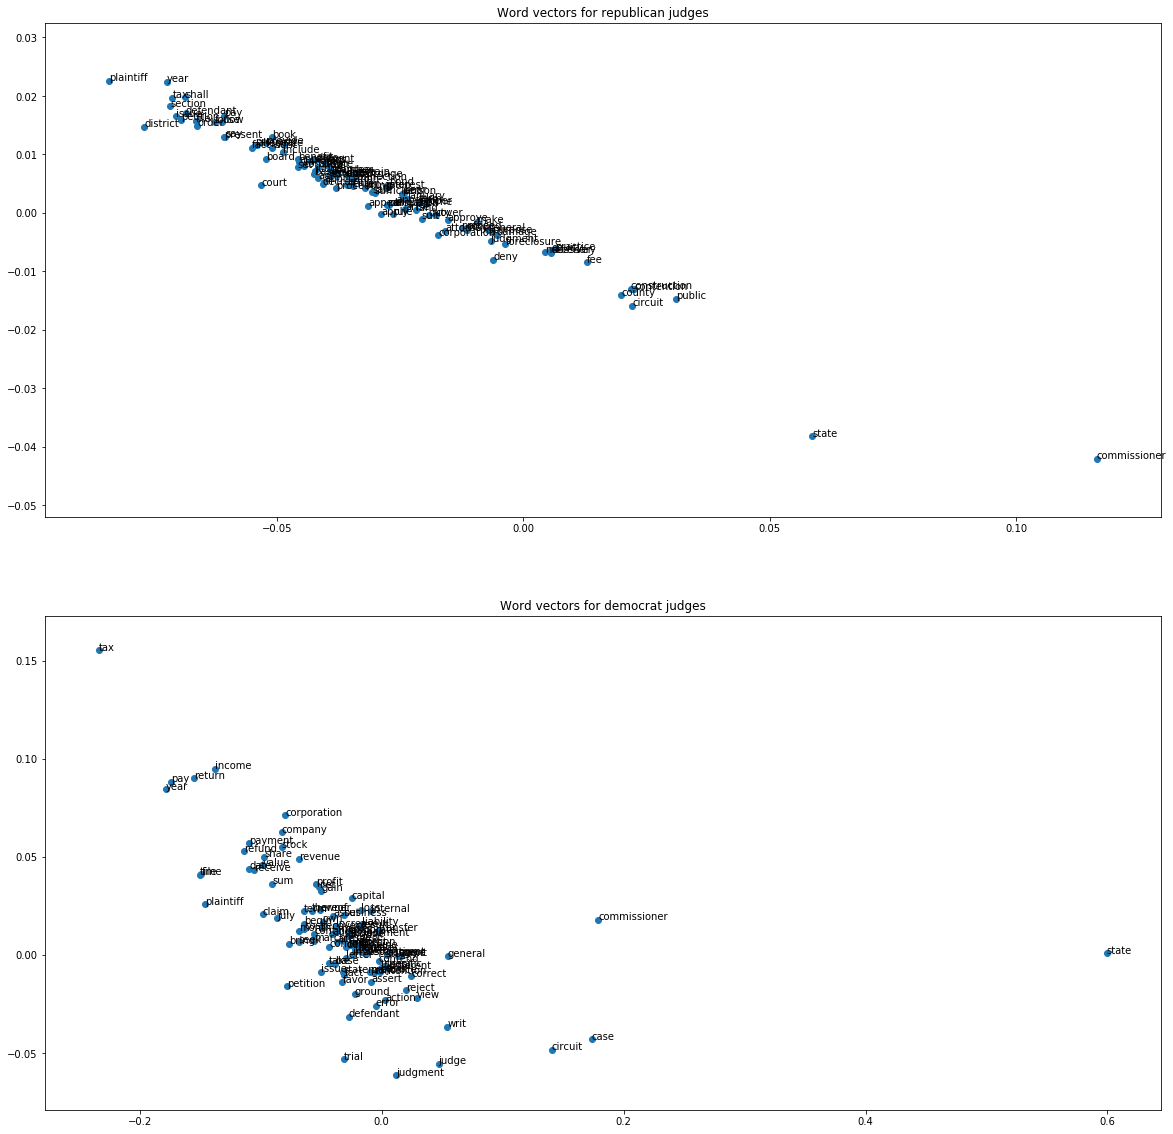

In [38]:
#Again plot both models
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# fit a 2d PCA model to the vectors
X1 = w2v_r[w2v_r.wv.vocab]
X2 = w2v_d[w2v_d.wv.vocab]
pca = PCA(n_components=2)
res_r = pca.fit_transform(X1)
res_d = pca.fit_transform(X2)

# create a scatter plot of the projection
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.scatter(res_r[:100, 0], res_r[:100, 1])
plt.title("Word vectors for republican judges")
words = list(w2v_r.wv.vocab)[:100]
for i, word in enumerate(words):
    plt.annotate(word, xy=(res_r[i, 0], res_r[i, 1]))
    
plt.subplot(2,1,2)
plt.scatter(res_d[:100, 0], res_d[:100, 1])
plt.title("Word vectors for democrat judges")
words = list(w2v_d.wv.vocab)[:100]
for i, word in enumerate(words):
    plt.annotate(word, xy=(res_d[i, 0], res_d[i, 1]))
    
plt.show()

#How can i only print the words associated with a topic?

In [42]:
w2v_d.wv.most_similar(positive=['man'], negative=['woman'])

[('tax', 0.13388627767562866),
 ('pay', 0.08760431408882141),
 ('year', 0.08464714139699936),
 ('return', 0.08096206188201904),
 ('income', 0.07769037783145905),
 ('period', 0.07560305297374725),
 ('shall', 0.06536758691072464),
 ('section', 0.06262888014316559),
 ('time', 0.05841893330216408),
 ('price', 0.05745435878634453)]

In [46]:
w2v_r.wv.most_similar(positive=["good"])

[('true', 0.9999392628669739),
 ('call', 0.9999351501464844),
 ('cover', 0.9999334812164307),
 ('think', 0.9999324083328247),
 ('substantial', 0.9999323487281799),
 ('come', 0.9999306201934814),
 ('exist', 0.9999288320541382),
 ('involve', 0.9999245405197144),
 ('duty', 0.9999241232872009),
 ('allegation', 0.9999239444732666)]